In [1]:
!pip install pandas-profiling==3.6.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f6156f42ce163ceee3bd2c42ec0e3249a0457010f350affbc51b57a7a307f5f0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninsta

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets

In [3]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

1) Importando e conhecendo o DataSet

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estruturação de dados/data.csv', encoding='windows-1254')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
ProfileReport(df, title="Profiling Report")

# Verificado que existe valores duplicados e que compoem 1% da analise
# Valores faltantes em CustomerID
# InvoceNO e stock code não vai trazer nada de analise
# Valores negativos em quantity e unitprice
# Valores Zerados em unitPrice

Output hidden; open in https://colab.research.google.com to view.

2) Tratando os valores faltantes

In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.isna().sum()/df.shape[0]*100
# Visto que a quantidade de nulos não é tão alta para remover a coluna como um todo

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [10]:
df[df.isna()].head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Removendo colunas que teriam muitos NAs

# Valor máximo de NAs permitido
max_nan_freq = 0.7
# Identificando as colunas
# .div quer dizer divisão, só que sem a /
na_cols =df.isna().sum().div(len(df))

# Consultando que colunas passam o máximo permitido
cols2_drop = na_cols[na_cols>max_nan_freq].index
print(cols2_drop)

# Dropando esse coluna com muito Nas
df.drop(columns=cols2_drop)


Index([], dtype='object')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
# Removendo as linhas que tem os valores nulos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [13]:
# Removendo a coluna que não fazem sentido para a analise
df.drop(columns=['StockCode'], inplace=True)
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


3) Verificando valores unitários que estão igual ou inferior a 0

In [14]:
# Coluna de quantidade e preço que estão fora do padrão
df.query('(Quantity<=0) or (UnitPrice<=0)')

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [15]:
df =df.query('(Quantity> 0) and (UnitPrice>0)')
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   Description  397884 non-null  object 
 2   Quantity     397884 non-null  int64  
 3   InvoiceDate  397884 non-null  object 
 4   UnitPrice    397884 non-null  float64
 5   CustomerID   397884 non-null  float64
 6   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.3+ MB


4) Verificando linhas duplicadas

In [17]:
# Verificando a quantidade de valores duplicados
df.duplicated(keep=False).sum()

10062

In [18]:
df[df.duplicated(keep=False)]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...
541675,581538,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [19]:
var_listColunas = df.columns.to_list()
var_listColunas

['InvoiceNo',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [20]:
# Identificando o numero de valores duplicados por linha

# Identificar quantos valores duplicados há em cada duplicata
# (
#   df
#  .groupby(var_listColunas, dropna=False)
#  .size()
#  .to_frame('n_duplicates')
#  .query('n_duplicates>1')
#  .sort_values('n_duplicates', ascending=False)
#  .head(5)
# )

(
 df
 .groupby(var_listColunas, dropna= False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(20)
)

n_duplicates
InvoiceNo Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
540524    BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    HOME BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6
578289    BELLE JARDINIERE CUSHION COVER      1        11/23/2011 14:07 3.75      17841.0    United Kingdom             6
541266    LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
547651    METAL SIGN,CUPCAKE SINGLE HOOK      1        3/24/2011 12:11  1.25      16904.0    United Kingdom             6
572344    Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
538517    FELTCRAFT PRINCESS CHARLOTTE DOLL   1        12/12/2010 16:05 3.75      17618.0    United Kingdom             5
574481    RABBIT NIGHT LIGHT                  1        11/4/2011 12:45  2.08      18022.0    United Kingdom             5
550331    HANGING WOOD AND FELT HEART         1        4/17/2011 13:43  0.42      15555.0    United Kingdom             5
537224    HI TEC ALPINE HAND WARMER           1        12/5/2010 16:24  1.65      13174.0    United Kingdom             5
547712    ROSES REGENCY TEACUP AND SAUCER     1        3/24/2011 19:31  2.95      16905.0    United Kingdom             5
578998    JINGLE BELL HEART ANTIQUE SILVER    1        11/27/2011 16:05 2.08      15436.0    United Kingdom             4
          JINGLE BELL HEART ANTIQUE GOLD      1        11/27/2011 16:05 2.08      15436.0    United Kingdom             4
541414    LOVE BUILDING BLOCK WORD            1        1/17/2011 16:14  5.95      18212.0    United Kingdom             4
547651    DECORATION WHITE CHICK MAGIC GARDEN 1        3/24/2011 12:11  0.85      16904.0    United Kingdom             4
540524    COLOUR GLASS T-LIGHT HOLDER HANGING 8        1/9/2011 12:53   0.65      16735.0    United Kingdom             4

In [21]:
# Removendo as linhas duplicadas
df.drop_duplicates(inplace=True)
df.info()

<ipython-input-21-3f19600c5a42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392657 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392657 non-null  object 
 1   Description  392657 non-null  object 
 2   Quantity     392657 non-null  int64  
 3   InvoiceDate  392657 non-null  object 
 4   UnitPrice    392657 non-null  float64
 5   CustomerID   392657 non-null  float64
 6   Country      392657 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.0+ MB


5) Ajustando os tipos de dados das colunas

In [22]:
# Alterando o tipo de dado da coluna Customer e Invoice date
df['CustomerID']= df['CustomerID'].astype(str)
df.head()

<ipython-input-22-a737a28a8b92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']= df['CustomerID'].astype(str)


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df.head()

<ipython-input-23-912c78f5d28c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392657 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392657 non-null  object        
 1   Description  392657 non-null  object        
 2   Quantity     392657 non-null  int64         
 3   InvoiceDate  392657 non-null  datetime64[ns]
 4   UnitPrice    392657 non-null  float64       
 5   CustomerID   392657 non-null  object        
 6   Country      392657 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.0+ MB


6)Tratando Outliers

In [25]:
df.describe()

,Quantity,UnitPrice
count,392657.000000,392657.000000
mean,13.120143,3.126100
std,180.500842,22.242818
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


<Axes: >

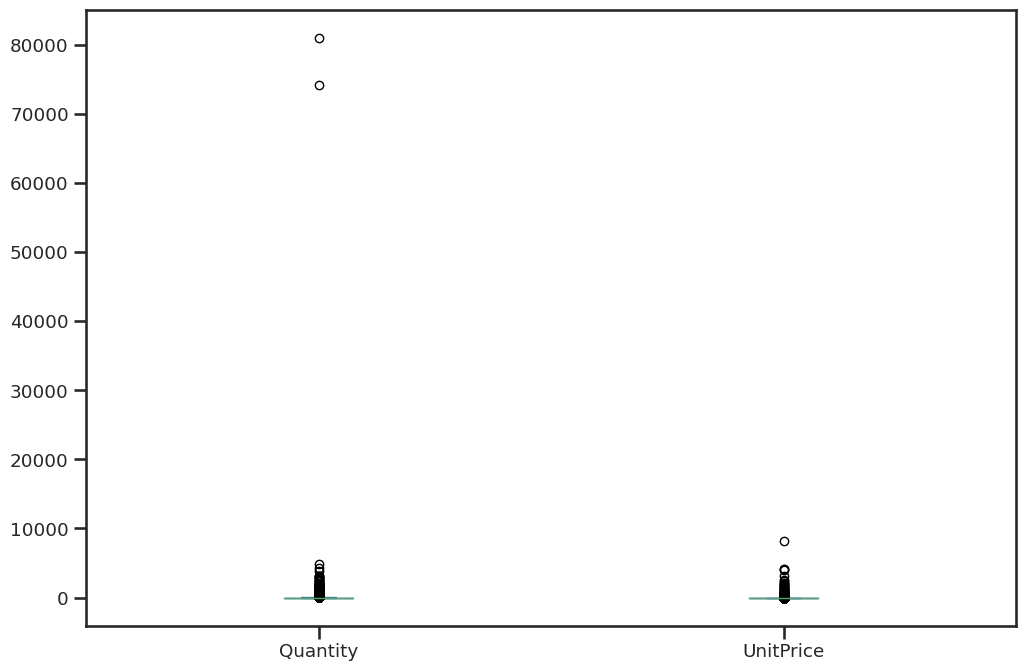

In [26]:
# a compra é superior a 10.000, e o preço unitário é maior que 5.000.
df.plot.box()

In [27]:
from sklearn.preprocessing import scale

In [28]:
def is_outlier(array, extreme=False):
  '''Função customizada para identificar outlier'''
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [29]:
# Mostrando aplicação da função em uma dada coluna
is_outlier(df.Quantity).sum()

25614

In [30]:
# Podemos ver que conforme passado pelo case o valor de 10K para a quantidade mostra os outliers extremos
df.query('Quantity> 10000')

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [31]:
# Podemos ver que conforme passado pelo case o valor de 5K para a unidade mostra os outliers extremos
df.query('UnitPrice>100')

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246,536392,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705.0,United Kingdom
4989,536835,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.00,13145.0,United Kingdom
19428,537859,REGENCY MIRROR WITH SHUTTERS,1,2010-12-08 16:11:00,165.00,14030.0,United Kingdom
19429,537859,RUSTIC SEVENTEEN DRAWER SIDEBOARD,2,2010-12-08 16:11:00,145.00,14030.0,United Kingdom
25168,538354,LOVE SEAT ANTIQUE WHITE METAL,2,2010-12-10 15:45:00,175.00,16873.0,United Kingdom
...,...,...,...,...,...,...,...
494728,578270,DOTCOM POSTAGE,1,2011-11-23 13:39:00,1270.06,14096.0,United Kingdom
508459,579196,DOTCOM POSTAGE,1,2011-11-28 15:54:00,1526.76,14096.0,United Kingdom
526015,580645,Manual,1,2011-12-05 13:11:00,219.50,17857.0,United Kingdom
528082,580727,DOTCOM POSTAGE,1,2011-12-05 17:17:00,1599.26,14096.0,United Kingdom


<Axes: >

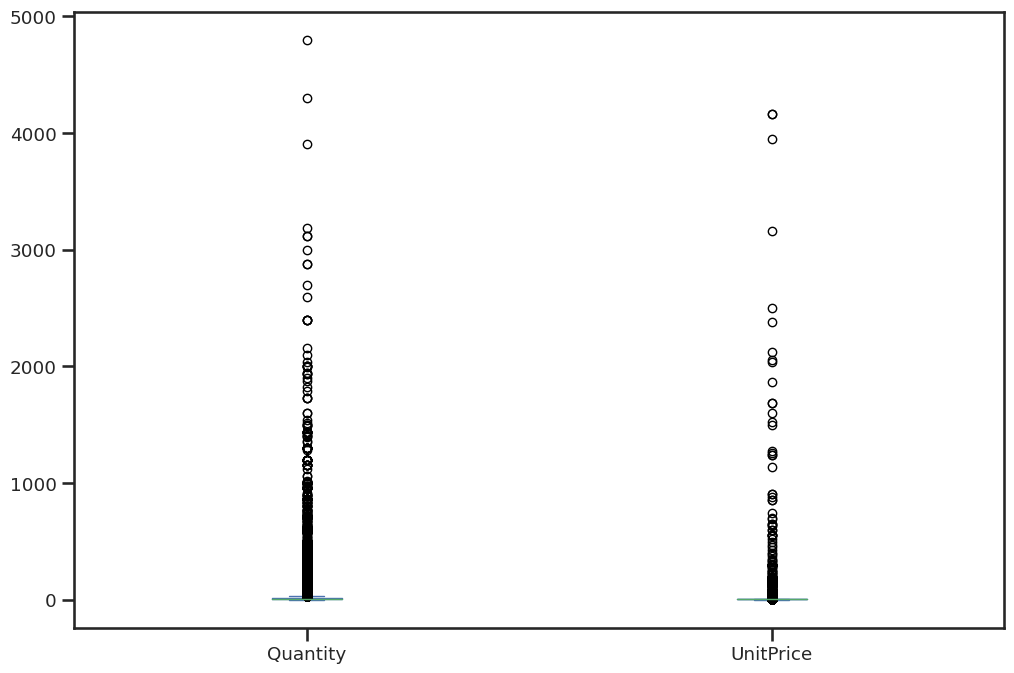

In [32]:
df = df.query('(Quantity<10000) & (UnitPrice<5000)')
df.plot.box()

7) Criando uma coluna adicional

In [33]:
# Criando a coluna para o preço total da compra
df['total_compra']= df['Quantity']*df['UnitPrice']
df.head()

<ipython-input-33-20311846f265>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_compra']= df['Quantity']*df['UnitPrice']


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_compra
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392654 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392654 non-null  object        
 1   Description   392654 non-null  object        
 2   Quantity      392654 non-null  int64         
 3   InvoiceDate   392654 non-null  datetime64[ns]
 4   UnitPrice     392654 non-null  float64       
 5   CustomerID    392654 non-null  object        
 6   Country       392654 non-null  object        
 7   total_compra  392654 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [35]:
df.describe()

,Quantity,UnitPrice,total_compra
count,392654.000000,392654.000000,392654.000000
mean,12.724956,3.105378,21.986884
std,43.085477,18.055841,95.903235
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,4800.000000,4161.060000,38970.000000


8) Última data de compra

In [37]:
# Atribuinda a variável var_dateDataUltimaCompra com o valor da última compra realizada

var_dateDataUltimaCompra = df.InvoiceDate.max()
var_dateDataUltimaCompra

Timestamp('2011-12-09 12:50:00')

9) Top 10 valores

In [38]:
%pip install ploty
%pip install cufflinks
%pip install chart-studio

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [39]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [40]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_compra
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [41]:
# Top 10 países com maior valor em vendas
df_maioresVendas = df.groupby('Country')['total_compra'].agg('sum').sort_values(ascending=False).reset_index().head(10)

px.bar(df_maioresVendas, x= 'Country', y='total_compra')

In [42]:
# Top 10 produtos mais vendidos
df_maioresProdutos = df.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False).reset_index().head(10)

px.bar(df_maioresProdutos, x= 'Description', y='Quantity')

In [43]:
df_teste = [df['InvoiceDate'].dt.month]
df_teste

[0         12
 1         12
 2         12
 3         12
 4         12
           ..
 541904    12
 541905    12
 541906    12
 541907    12
 541908    12
 Name: InvoiceDate, Length: 392654, dtype: int64]

In [44]:
# Valor de venda total por mês
df_VendasPorMes = df.groupby(df['InvoiceDate'].dt.month)['total_compra'].agg('sum').sort_values(ascending=False).reset_index()

px.bar(df_VendasPorMes, x= 'InvoiceDate', y='total_compra')

<Axes: xlabel='InvoiceDate', ylabel='total_compra'>

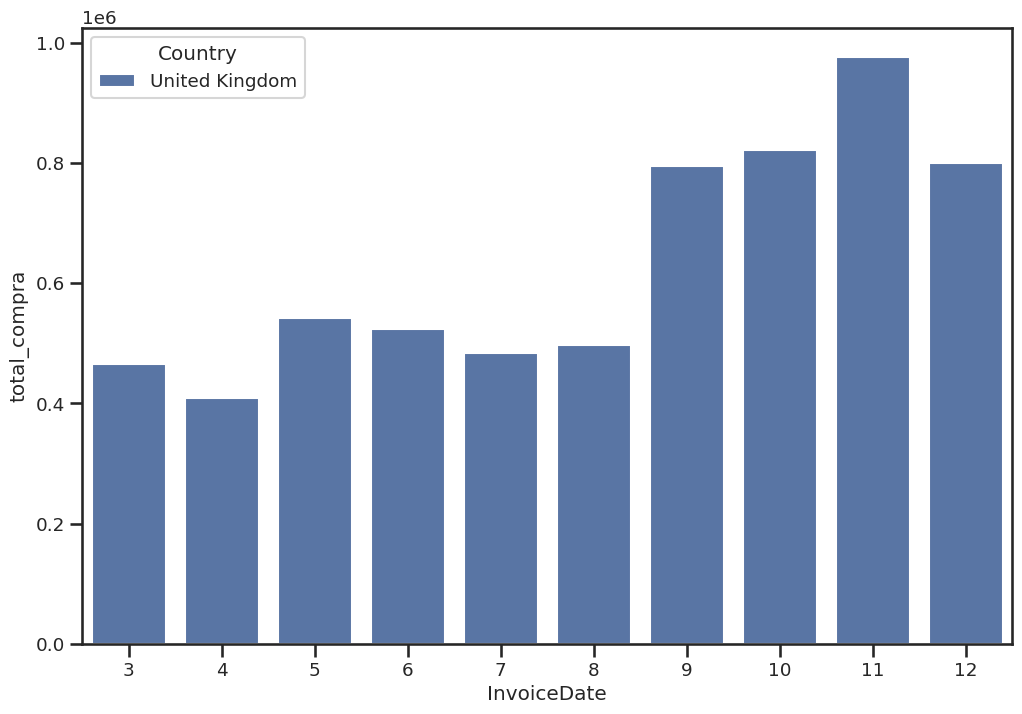

In [45]:
# Valor de venda total por mês e por país (considere apenas os top 10
df_VendasPaisMensal = df.groupby(['Country',df['InvoiceDate'].dt.month])['total_compra'].agg('sum').sort_values(ascending=False).reset_index().head(10)

sns.barplot(data=df_VendasPaisMensal, x='InvoiceDate', y='total_compra', hue='Country')

10)Cálculo do RFM


Dica: Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a
data e o preço total do pedido.
Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:
- R é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [46]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_compra
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [139]:
var_dateDataUltimaCompra

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392654 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392654 non-null  object        
 1   Description   392654 non-null  object        
 2   Quantity      392654 non-null  int64         
 3   InvoiceDate   392654 non-null  datetime64[ns]
 4   UnitPrice     392654 non-null  float64       
 5   CustomerID    392654 non-null  object        
 6   Country       392654 non-null  object        
 7   total_compra  392654 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [115]:
df_grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',       # Última data do pedido
    'total_compra': 'sum'         # Total do pedido
    }).reset_index()

df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,total_compra
0,12347.0,537626,2010-12-07 14:57:00,711.79
1,12347.0,542237,2011-01-26 14:30:00,475.39
2,12347.0,549222,2011-04-07 10:43:00,636.25
3,12347.0,556201,2011-06-09 13:01:00,382.52
4,12347.0,562032,2011-08-02 08:48:00,584.91


In [142]:
df_grouped['Frequency'] = df.groupby('CustomerID')['Quantity'].agg('sum')
df_grouped.describe()

,total_compra,Recency,Frequency
count,18529.000000,18529.000000,0.0
mean,465.931137,160.339144,NaN
std,986.088036,112.733775,NaN
min,0.380000,0.000000,NaN
25%,157.310000,57.000000,NaN
50%,302.560000,149.000000,NaN
75%,469.430000,253.000000,NaN
max,38970.000000,373.000000,NaN


In [146]:
df_grouped['Mean ticket'] = df_grouped['total_compra'].mean()
df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,total_compra,Recency,Frequency,Mean ticket
0,12347.0,537626,2010-12-07 14:57:00,711.79,366,NaN,465.931137
1,12347.0,542237,2011-01-26 14:30:00,475.39,316,NaN,465.931137
2,12347.0,549222,2011-04-07 10:43:00,636.25,246,NaN,465.931137
3,12347.0,556201,2011-06-09 13:01:00,382.52,182,NaN,465.931137
4,12347.0,562032,2011-08-02 08:48:00,584.91,129,NaN,465.931137


In [147]:
df_grouped.to_csv('e-commerce_RFM', index=False)